In [2]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
from functions import *
import seaborn as sns
import numpy as np

In [3]:
df = adjust_dataframe(get_dataframe("../csv_files/"))

In [4]:
df

,graph,cuts,best_partition,generations,vertices,edges,time,depth,g_max,mutation,population,Prob
0,er_100_160_0.csv,6400,"[3, 5, 7, 11, 12, 16, 18, 19, 20, 21, 25, 26, ...",39,160,12720,92.661339,10,60,0.5,6,100
1,er_70_120_1.csv,2555,"[11, 12, 13, 14, 20, 22, 25, 33, 0, 1, 2, 3, 4...",52,120,5028,144.659320,10,60,0.5,6,70
2,er_90_120_1.csv,3250,"[1, 3, 4, 6, 9, 12, 13, 14, 16, 18, 19, 20, 24...",59,120,6431,143.901366,10,60,0.5,6,90
3,er_80_200_3.csv,8072,"[0, 2, 5, 6, 8, 9, 10, 11, 13, 15, 16, 18, 19,...",55,200,15946,309.696353,10,60,0.5,6,80
4,er_80_160_1.csv,5072,"[0, 1, 2, 3, 7, 14, 17, 18, 24, 25, 26, 27, 28...",54,160,10223,252.428979,10,60,0.5,6,80
...,...,...,...,...,...,...,...,...,...,...,...,...
295,er_80_80_3.csv,1296,"[2, 3, 11, 15, 16, 19, 20, 21, 24, 25, 26, 27,...",33,80,2522,61.293880,10,60,0.5,6,80
296,er_60_80_1.csv,964,"[1, 9, 8, 3, 4, 6, 14, 15, 17, 20, 22, 26, 28,...",16,80,1886,46.856714,10,60,0.5,6,60
297,er_70_160_0.csv,4526,"[1, 2, 3, 4, 5, 6, 7, 8, 12, 13, 17, 19, 21, 2...",56,160,8925,214.154493,10,60,0.5,6,70
298,er_80_120_1.csv,2861,"[0, 1, 2, 4, 5, 6, 8, 9, 11, 13, 16, 17, 18, 2...",55,120,5693,71.774650,1,60,0.5,6,80


In [5]:
dataframe_statistics(df, "vertices", ["cuts","vertices"]) 

cuts                                                              \
         count         mean          std     min      25%     50%      75%   
vertices                                                                     
40        60.0   326.583333    54.053737   242.0   278.00   328.0   370.00   
80        60.0  1278.050000   227.969030   937.0  1105.50  1284.5  1447.25   
120       60.0  2857.516667   515.339825  1939.0  2470.50  2882.5  3270.00   
160       60.0  5068.183333   929.966074  3737.0  4418.25  5090.5  5768.25   
200       60.0  7661.433333  1817.363973   139.0  6553.25  7965.0  9011.75   

                   
              max  
vertices           
40          400.0  
80         1600.0  
120        3600.0  
160        6400.0  
200       10000.0

In [6]:
df[["cuts", "vertices"]].groupby("vertices").describe()

cuts                                                              \
         count         mean          std     min      25%     50%      75%   
vertices                                                                     
40        60.0   326.583333    54.053737   242.0   278.00   328.0   370.00   
80        60.0  1278.050000   227.969030   937.0  1105.50  1284.5  1447.25   
120       60.0  2857.516667   515.339825  1939.0  2470.50  2882.5  3270.00   
160       60.0  5068.183333   929.966074  3737.0  4418.25  5090.5  5768.25   
200       60.0  7661.433333  1817.363973   139.0  6553.25  7965.0  9011.75   

                   
              max  
vertices           
40          400.0  
80         1600.0  
120        3600.0  
160        6400.0  
200       10000.0

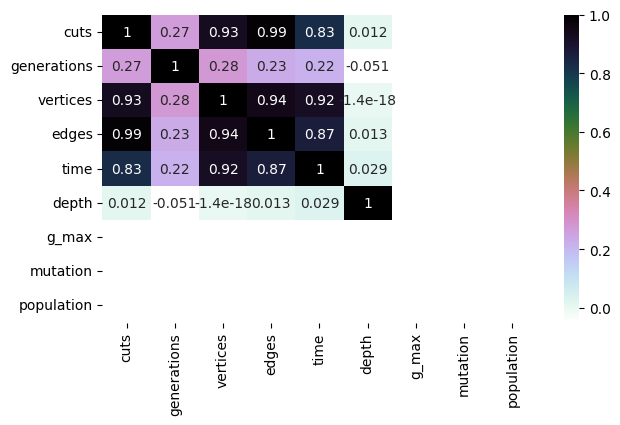

In [7]:
plt.figure(figsize=(7,4)) 
sns.heatmap(df.corr(),annot=True,cmap='cubehelix_r')
plt.savefig("HeatMapCorr")
plt.show()

In [8]:
sdp = pd.read_csv("../sdp-data.csv")

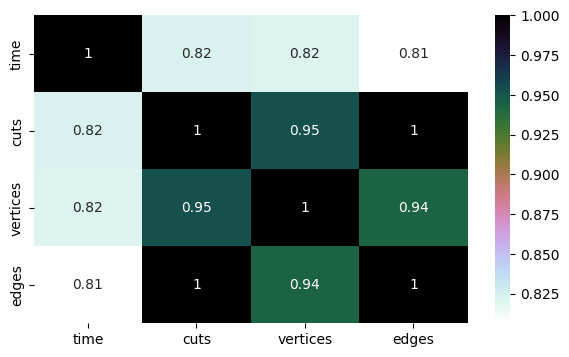

In [9]:
plt.figure(figsize=(7,4)) 
sns.heatmap(sdp.corr(),annot=True,cmap='cubehelix_r')
plt.savefig("HeatMapCorr")
plt.show()

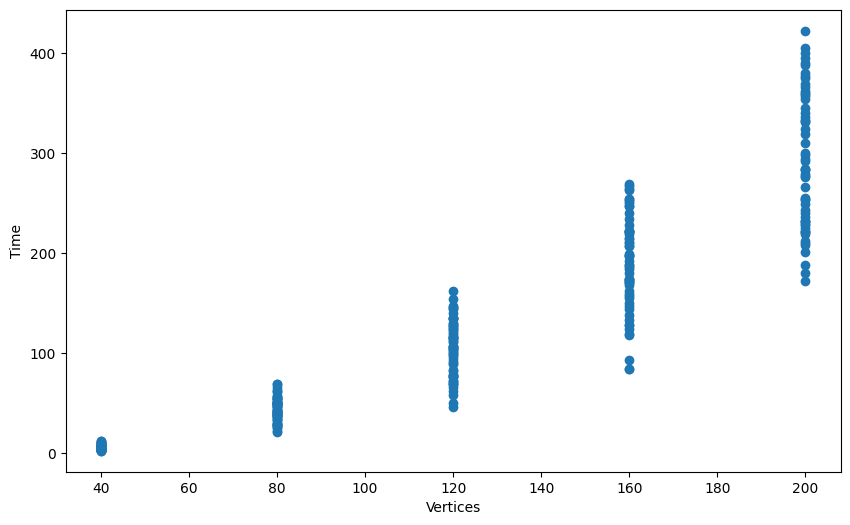

In [10]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = df['vertices'], y = df['time'])
plt.xlabel("Vertices")
plt.ylabel("Time")

plt.show()

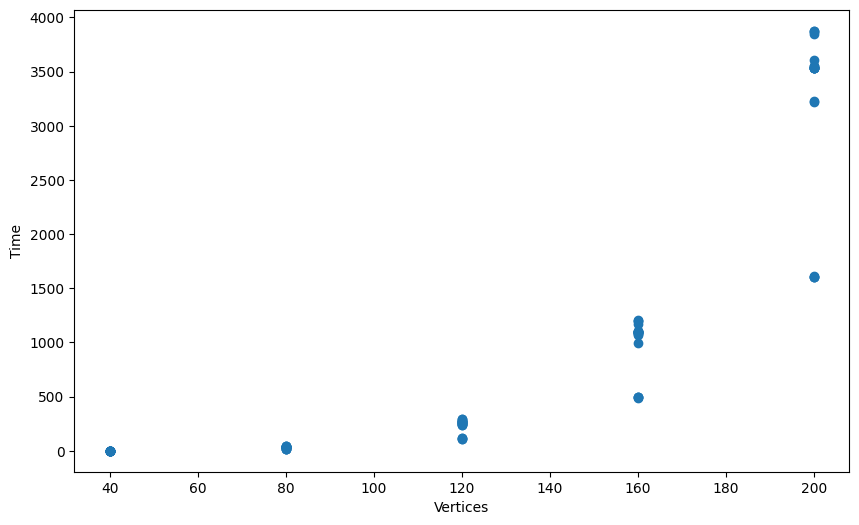

In [11]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = sdp['vertices'], y = sdp['time'])
plt.xlabel("Vertices")
plt.ylabel("Time")

plt.show()

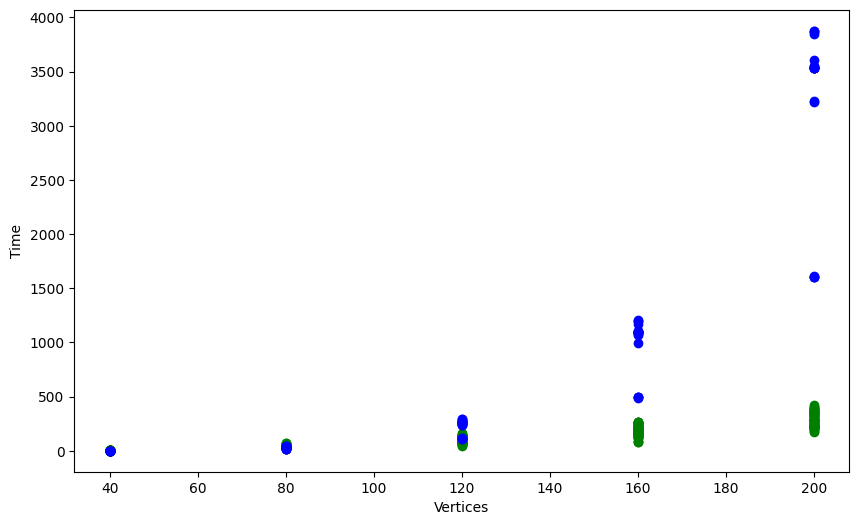

In [21]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = df['vertices'], y = df['time'], color='g')
plt.xlabel("Vertices")
plt.ylabel("Time")
ax.scatter(x = sdp['vertices'], y = sdp['time'], color='b')
plt.xlabel("Vertices")
plt.ylabel("Time")

plt.show()

In [47]:
df['Prob'] = df['Prob'].apply( lambda x: int(x) )

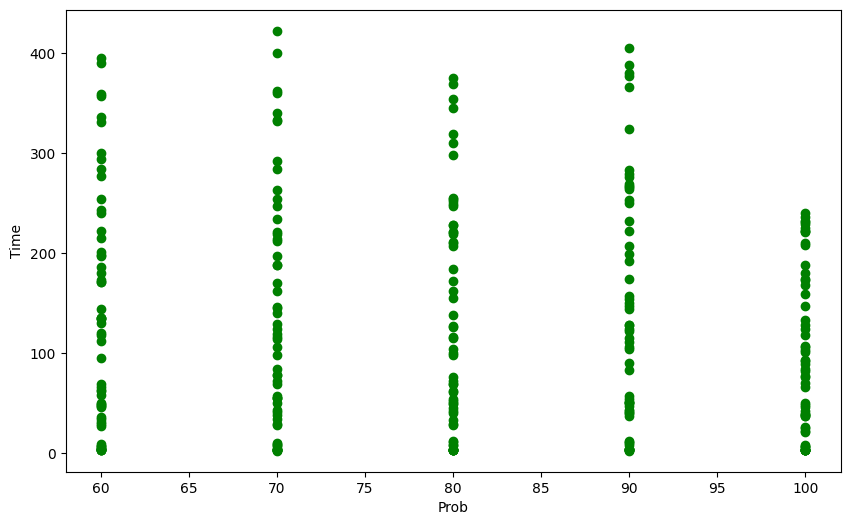

In [48]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = df['Prob'], y = df['time'], color='g')
plt.xlabel("Prob")
plt.ylabel("Time")
plt.show()

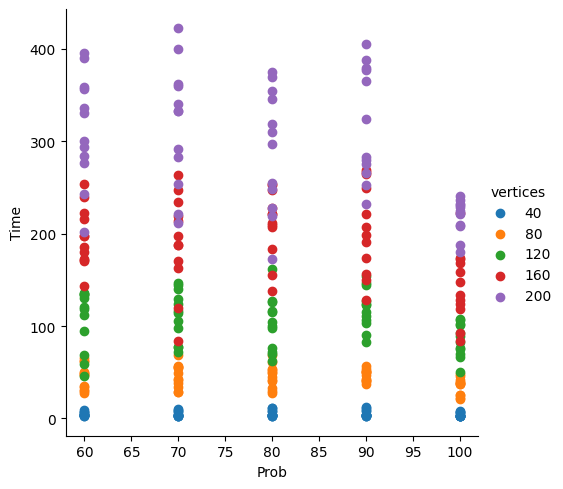

In [49]:
sns.FacetGrid(df, hue="vertices", height=5) \
   .map(plt.scatter, "Prob", "time") \
   .add_legend()
plt.xlabel("Prob")
plt.ylabel("Time")
plt.show()

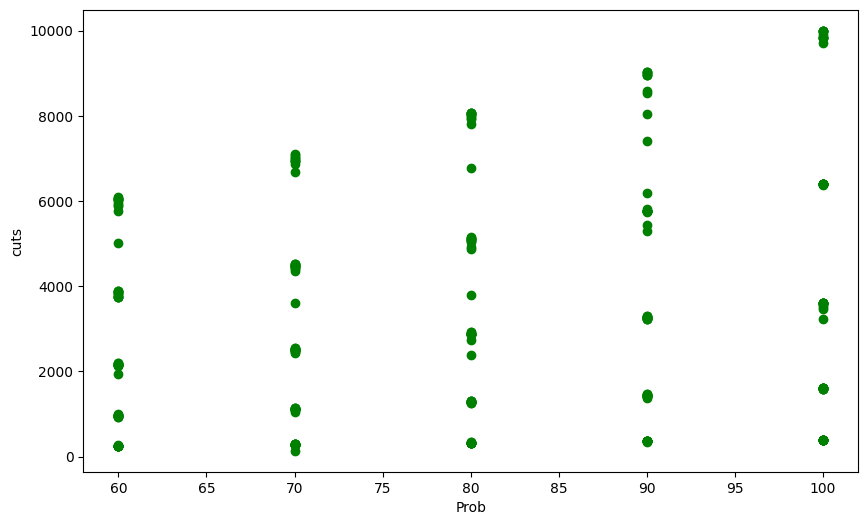

In [50]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = df['Prob'], y = df['cuts'], color='g')
plt.xlabel("Prob")
plt.ylabel("cuts")
plt.show()

In [14]:
df_mean = df[["cuts", "graph"]].groupby("graph").mean()

In [15]:
df_mean["mean-cut"] = df_mean["cuts"]

In [16]:
df_mean = df_mean.drop("cuts", axis=1)

In [17]:
df_mean

,mean-cut
graph,
er_100_120_0.csv,3598.666667
er_100_120_1.csv,3600.000000
er_100_120_2.csv,3525.000000
er_100_120_3.csv,3459.333333
er_100_160_0.csv,6388.666667
...,...
er_90_40_3.csv,359.666667
er_90_80_0.csv,1428.333333
er_90_80_1.csv,1423.000000


In [18]:
df_teste = sdp.merge(df_mean, on=['graph','graph'], how='right')

In [19]:
df_teste

,time,cuts,graph,vertices,edges,mean-cut
0,112.360686,3590,er_100_120_0.csv,120,7140,3598.666667
1,112.259985,3589,er_100_120_1.csv,120,7140,3600.000000
2,121.356712,3589,er_100_120_2.csv,120,7140,3525.000000
3,121.266138,3587,er_100_120_3.csv,120,7140,3459.333333
4,495.403952,6386,er_100_160_0.csv,160,12720,6388.666667
...,...,...,...,...,...,...
95,2.469144,382,er_90_40_3.csv,40,707,359.666667
96,45.822250,1494,er_90_80_0.csv,80,2819,1428.333333
97,38.571160,1492,er_90_80_1.csv,80,2828,1423.000000
98,41.763594,1508,er_90_80_2.csv,80,2867,1435.666667


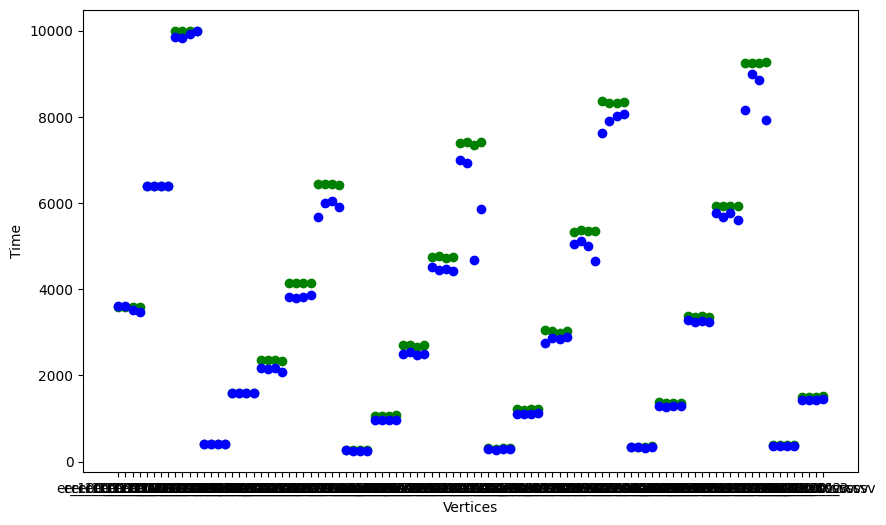

In [51]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = df_teste['graph'], y = df_teste['cuts'], color='g')
plt.xlabel("Vertices")
plt.ylabel("Time")
ax.scatter(x = df_teste['graph'], y = df_teste['mean-cut'], color='b')
plt.xlabel("Vertices")
plt.ylabel("Time")

plt.show()

In [75]:
df_100 = df_mean[ df_mean["Prob"] == 100 ]

KeyError: 'Prob'

In [63]:
df_prob = df[['graph', 'Prob']]

In [64]:
sdp_prob = sdp.merge(df_prob, on=['graph','graph'], how='right')

In [72]:
sdp_100 = sdp[ sdp_prob["Prob"] == 100 ]

/tmp/ipykernel_17688/242254486.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sdp_100 = sdp[ sdp_prob["Prob"] == 100 ]


In [73]:
sdp_100

,time,cuts,graph,vertices,edges
0,495.403952,6386,er_100_160_0.csv,160,12720
24,17.091828,1593,er_100_80_0.csv,80,3160
36,1614.153427,9982,er_100_200_3.csv,200,19900
38,484.263180,6383,er_100_160_3.csv,160,12720
42,17.133054,1593,er_100_80_1.csv,80,3160
46,1607.999197,9979,er_100_200_1.csv,200,19900
52,1.136815,397,er_100_40_3.csv,40,780
57,16.719480,1593,er_100_80_2.csv,80,3160
58,121.266138,3587,er_100_120_3.csv,120,7140
59,16.872294,1593,er_100_80_3.csv,80,3160


In [74]:
df_100

,graph,cuts,best_partition,generations,vertices,edges,time,depth,g_max,mutation,population,Prob
0,er_100_160_0.csv,6400,"[3, 5, 7, 11, 12, 16, 18, 19, 20, 21, 25, 26, ...",39,160,12720,92.661339,10,60,0.5,6,100
24,er_100_80_0.csv,1600,"[1, 5, 22, 25, 26, 29, 3, 4, 6, 7, 10, 11, 16,...",25,80,3160,39.399218,10,60,0.5,6,100
36,er_100_200_3.csv,9999,"[5, 2, 4, 6, 9, 12, 14, 17, 18, 19, 22, 24, 25...",38,200,19900,188.166057,10,60,0.5,6,100
38,er_100_160_3.csv,6400,"[3, 10, 11, 13, 14, 21, 22, 25, 27, 28, 29, 30...",52,160,12720,147.193311,10,60,0.5,6,100
42,er_100_80_1.csv,1591,"[17, 3, 4, 6, 7, 10, 11, 13, 16, 18, 23, 30, 3...",27,80,3160,38.540096,10,60,0.5,6,100
46,er_100_200_1.csv,9831,"[5, 9, 12, 14, 17, 18, 19, 22, 24, 25, 28, 30,...",52,200,19900,208.040926,10,60,0.5,6,100
52,er_100_40_3.csv,400,"[0, 1, 2, 5, 10, 22, 23, 24, 11, 21, 7, 8, 13,...",9,40,780,2.838123,10,60,0.5,6,100
57,er_100_80_2.csv,1600,"[3, 4, 6, 7, 10, 12, 13, 15, 16, 18, 23, 24, 2...",53,80,3160,48.025749,10,60,0.5,6,100
58,er_100_120_3.csv,3239,"[3, 6, 24, 31, 32, 33, 36, 48, 61, 66, 23, 25,...",58,120,7140,92.101309,10,60,0.5,6,100
59,er_100_80_3.csv,1600,"[3, 4, 6, 7, 10, 13, 16, 18, 21, 23, 29, 30, 3...",40,80,3160,37.196486,10,60,0.5,6,100


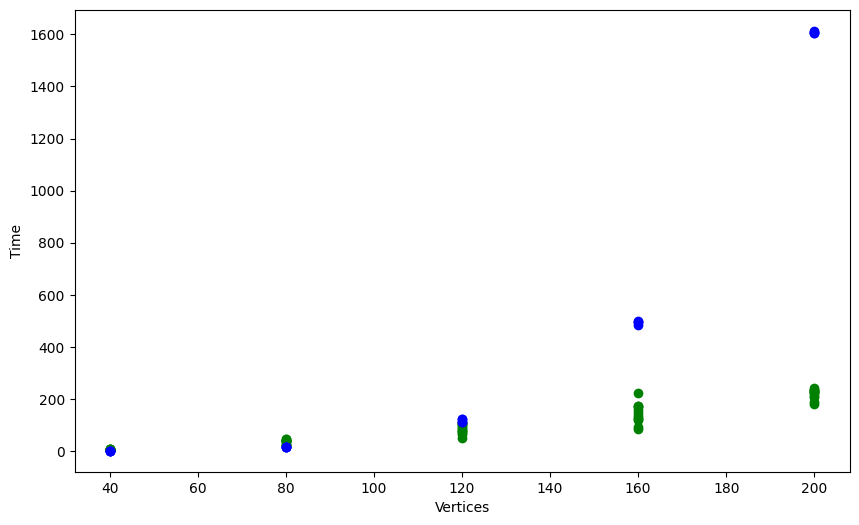

In [77]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = df_100['vertices'], y = df_100['time'], color='g')
plt.xlabel("Vertices")
plt.ylabel("Time")
ax.scatter(x = sdp_100['vertices'], y = sdp_100['time'], color='b')
plt.xlabel("Vertices")
plt.ylabel("Time")

plt.show()

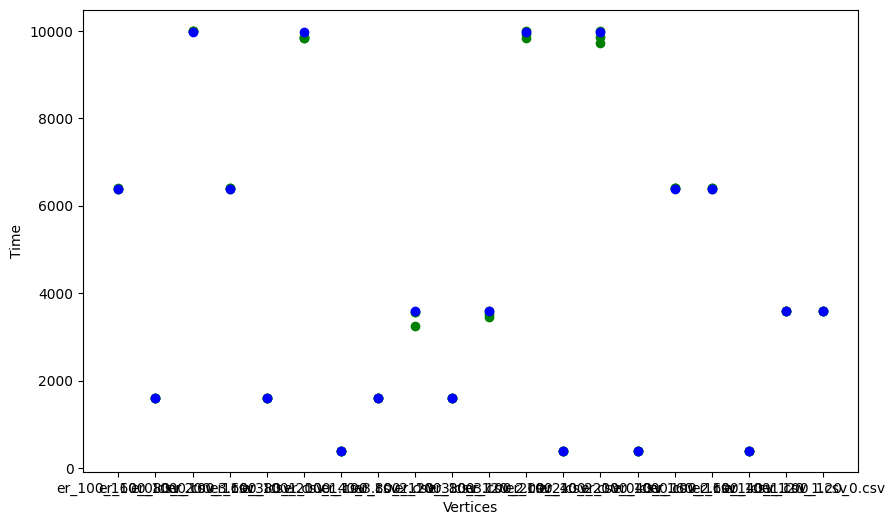

In [78]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = df_100['graph'], y = df_100['cuts'], color='g')
plt.xlabel("Vertices")
plt.ylabel("Time")
ax.scatter(x = sdp_100['graph'], y = sdp_100['cuts'], color='b')
plt.xlabel("Vertices")
plt.ylabel("Time")

plt.show()